In [56]:
import pandas as pd
import numpy as np

# Load the files
exposure_data = pd.read_csv('exposure_data.csv')
inspection_data = pd.read_csv('inspection_data.csv')

In [57]:
# check for missing values
exposure_data.isna().sum()

Fab           0
LithoCell     0
Stage         0
Wafer         0
FieldX        0
FieldY        0
Lot           0
Date          0
Time          0
Focus        25
ExpDose      25
dtype: int64

In [58]:
inspection_data.isna().sum()

Lot          0
Wafer        0
FieldX       0
FieldY       0
InspTool     0
Defect      25
dtype: int64

In [59]:
# Drop rows with missing values in both datasets
exposure_data_cleaned = exposure_data.dropna()
inspection_data_cleaned = inspection_data.dropna()

In [60]:
# Check for duplicate rows in both datasets
exposure_data_cleaned.duplicated().sum()

0

In [61]:
inspection_data_cleaned.duplicated().sum()

0

In [62]:
# Check data types and consider adjustments if needed
exposure_data_cleaned.dtypes

Fab           object
LithoCell     object
Stage          int64
Wafer          int64
FieldX         int64
FieldY         int64
Lot           object
Date          object
Time          object
Focus        float64
ExpDose      float64
dtype: object

In [63]:
inspection_data_cleaned.dtypes

Lot          object
Wafer         int64
FieldX        int64
FieldY        int64
InspTool     object
Defect      float64
dtype: object

In [64]:
# Combine 'Date' and 'Time' into a single datetime column
exposure_data_cleaned['DateTime'] = pd.to_datetime(exposure_data_cleaned['Date'] + ' ' + exposure_data_cleaned['Time'])

# Drop the original 'Date' and 'Time' columns
exposure_data_cleaned = exposure_data_cleaned.drop(['Date', 'Time'], axis=1)

C:\Users\Shahi\AppData\Local\Temp\ipykernel_5032\1144249544.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exposure_data_cleaned['DateTime'] = pd.to_datetime(exposure_data_cleaned['Date'] + ' ' + exposure_data_cleaned['Time'])


In [65]:
# Merge the cleaned exposure data and inspection data
merged_data = pd.merge(exposure_data_cleaned, inspection_data_cleaned, on=['Lot', 'Wafer', 'FieldX', 'FieldY'])

merged_data.head()

,Fab,LithoCell,Stage,Wafer,FieldX,FieldY,Lot,Focus,ExpDose,DateTime,InspTool,Defect
0,FAB_A,LITH15,2,17,-7,-3,6V78TJ10,-39.736527,9.967321,2017-05-21 09:00:00,INSP14C,1.0
1,FAB_A,LITH06,2,2,-4,6,3JZX3ZUK,-19.423390,9.466734,2017-11-27 19:40:00,INSP14C,0.0
2,FAB_A,LITH02,2,20,7,-6,SKFPM6YR,77.052599,10.212761,2017-05-16 15:29:00,INSP08A,1.0
3,FAB_A,LITH14,2,4,7,-1,VINI5MWO,-3.179968,9.748477,2017-08-10 12:14:00,INSP12,0.0
4,FAB_A,LITH15,2,11,-5,-3,7SCWPT3O,-18.461324,10.645196,2017-09-05 05:53:00,INSP11,0.0


# Summary Statistics

In [85]:
merged_data.describe()

,Stage,Wafer,FieldX,FieldY,Focus,ExpDose,DateTime,Defect
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000,1000.000000
mean,1.509000,13.069000,-0.713000,-0.234000,0.836585,9.991298,2017-07-03 10:45:07.440000,0.441000
min,1.000000,1.000000,-10.000000,-10.000000,-65.751081,7.842162,2017-01-01 06:23:00,0.000000
25%,1.000000,7.000000,-6.000000,-5.000000,-15.691737,9.668903,2017-04-03 18:02:45,0.000000
50%,2.000000,13.000000,-1.000000,0.000000,0.882137,9.984174,2017-07-05 06:26:30,0.000000
75%,2.000000,19.000000,4.250000,5.000000,16.273010,10.340737,2017-10-01 07:46:15,1.000000
max,2.000000,25.000000,9.000000,9.000000,83.167447,11.559726,2017-12-31 21:39:00,1.000000
std,0.500169,7.224017,5.958199,5.745107,24.698545,0.503198,NaN,0.496755


# Distribution of the Target Variable

In [86]:
merged_data['Defect'].value_counts(normalize=True)

Defect
0.0    0.559
1.0    0.441
Name: proportion, dtype: float64

<Axes: >

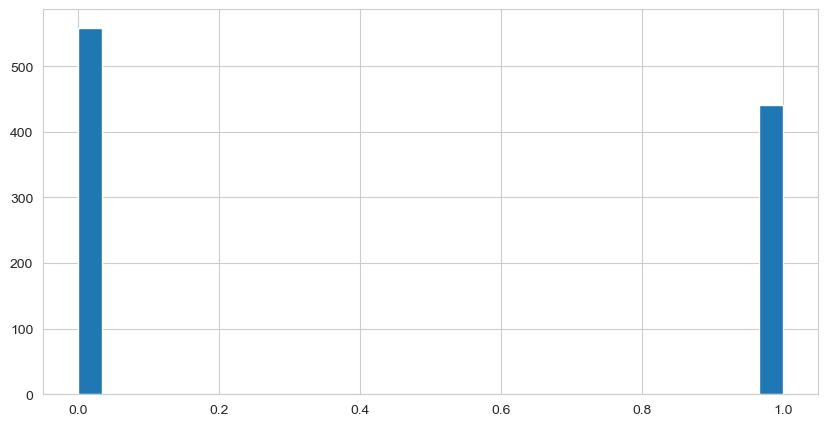

In [92]:
merged_data['Defect'].hist(bins=30, figsize=(10, 5))

# Feature Distributions

array([[<Axes: title={'center': 'Focus'}>,
        <Axes: title={'center': 'ExpDose'}>]], dtype=object)

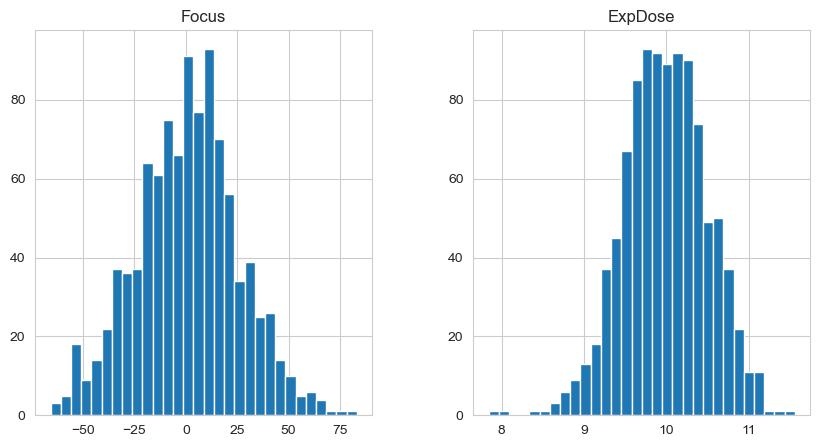

In [93]:
merged_data[['Focus', 'ExpDose']].hist(bins=30, figsize=(10, 5))

# Feature vs. Target Analysis

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


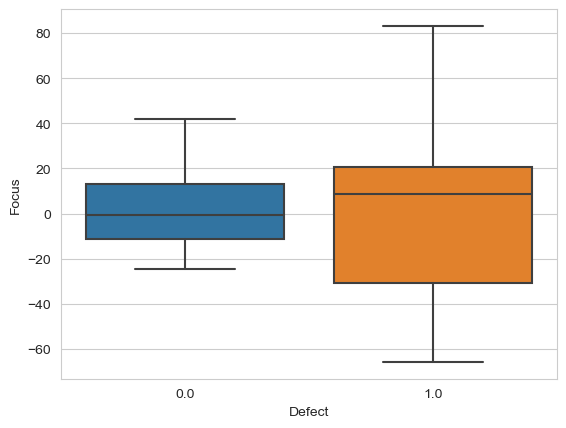

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


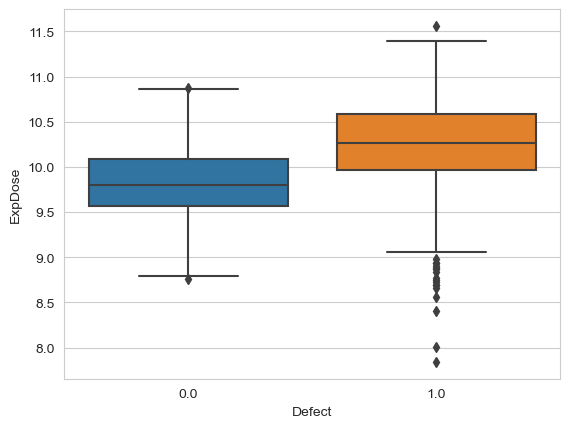

In [97]:
import seaborn as sns

sns.boxplot(x='Defect', y='Focus', data=merged_data)
plt.show()

sns.boxplot(x='Defect', y='ExpDose', data=merged_data)
plt.show()

# Correlation Analysis

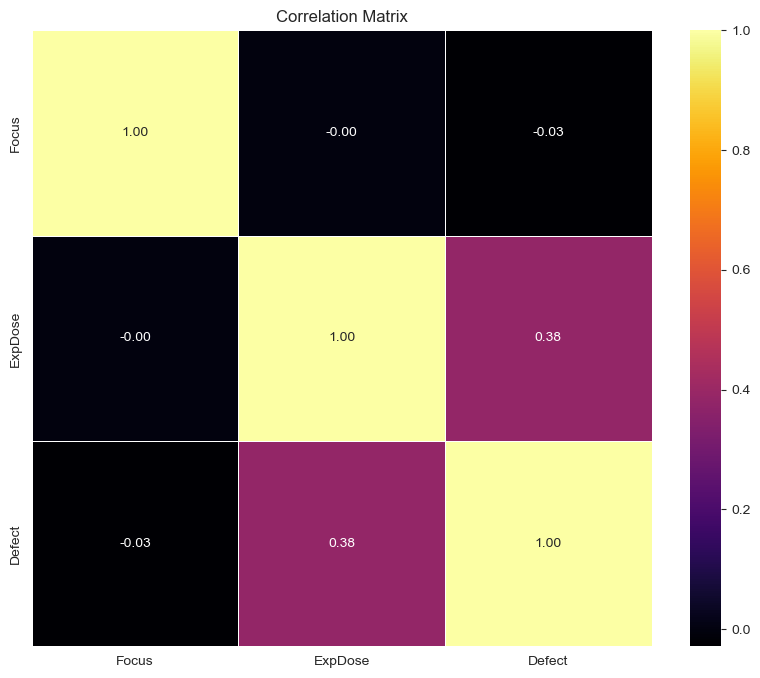

In [103]:
correlation_matrix = merged_data[['Focus', 'ExpDose', 'Defect']].corr()
# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='inferno', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

# Modeling

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()
features = ['Focus', 'ExpDose']
X = merged_data[features]
y = merged_data['Defect']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Verifying the final sizes of each dataset to confirm correct splits
(X_train_scaled.shape, X_test_scaled.shape, y_train.shape, y_test.shape)

((700, 2), (300, 2), (700,), (300,))

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

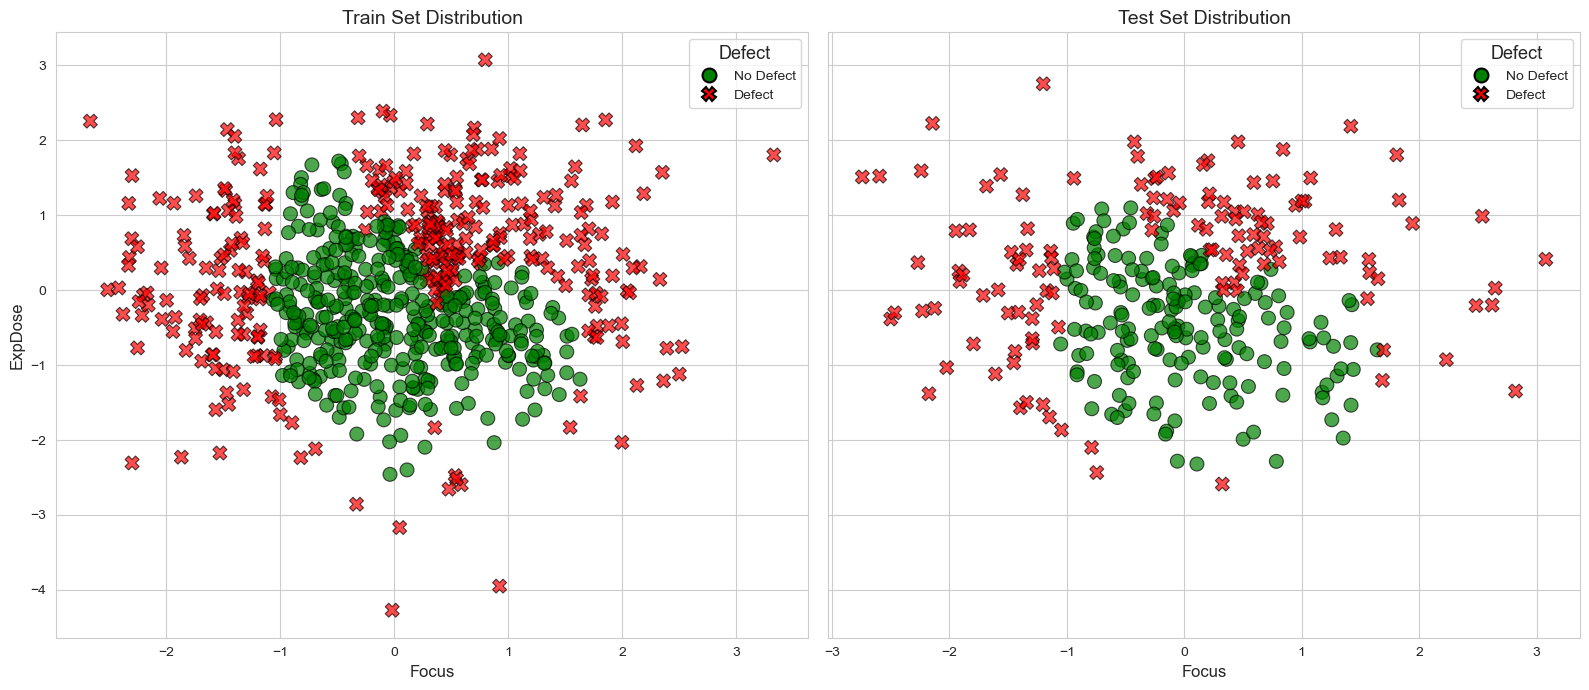

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

palette = {0: 'green', 1: 'red'}
sns.set_style("whitegrid")

fig, ax = plt.subplots(1, 2, figsize=(16, 7), sharey=True)


legend_labels = ['No Defect', 'Defect']
legend_markers = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10, markeredgewidth=1.5, markeredgecolor='k'),
                  plt.Line2D([0], [0], marker='X', color='w', markerfacecolor='red', markersize=10, markeredgewidth=1.5, markeredgecolor='k')]

# Train Set Plot
sns.scatterplot(ax=ax[0], x=X_train_scaled[:, 0], y=X_train_scaled[:, 1], hue=y_train, style=y_train, palette=palette, s=100, alpha=0.7, edgecolor='k')
ax[0].set_title('Train Set Distribution', fontsize=14)
ax[0].set_xlabel('Focus', fontsize=12)
ax[0].set_ylabel('ExpDose', fontsize=12)
ax[0].legend(handles=legend_markers, labels=legend_labels, fontsize=10, title='Defect', title_fontsize='13')

# Test Set Plot
sns.scatterplot(ax=ax[1], x=X_test_scaled[:, 0], y=X_test_scaled[:, 1], hue=y_test, style=y_test, palette=palette, s=100, alpha=0.7, edgecolor='k')
ax[1].set_title('Test Set Distribution', fontsize=14)
ax[1].set_xlabel('Focus', fontsize=12)
ax[1].legend(handles=legend_markers, labels=legend_labels, fontsize=10, title='Defect', title_fontsize='13')

plt.tight_layout()
plt.show()

#  Logistic Regression

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Logistic Regression model
log_reg = LogisticRegression(random_state=42)

# Fit the model on the training data
log_reg.fit(X_train_scaled, y_train)

# Predict on the validation set
y_test_pred = log_reg.predict(X_test_scaled)

# Evaluate the model performance on the validation set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_classification_report = classification_report(y_test, y_test_pred)

print(f'accuracy: {test_accuracy}\n')
print(test_classification_report)

accuracy: 0.74

              precision    recall  f1-score   support

         0.0       0.75      0.82      0.78       173
         1.0       0.72      0.64      0.67       127

    accuracy                           0.74       300
   macro avg       0.74      0.73      0.73       300
weighted avg       0.74      0.74      0.74       300



In [72]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D

def plot_decision_boundary(X, y, model, ax, title="Decision Boundary"):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    h = 0.02  # step size in the mesh
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    # Predict the function value for the whole grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    ax.contourf(xx, yy, Z, cmap=plt.cm.viridis, alpha=0.8)
    sns.scatterplot(ax=ax, x=X[:, 0], y=X[:, 1], hue=y, palette={0: 'green', 1: 'red'}, edgecolor='k', alpha=0.7)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Focus')
    ax.set_ylabel('ExpDose')
    ax.set_title(title)
    
    legend_elements = [
        Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10, markeredgewidth=1.5, markeredgecolor='k', label='No Defect'),
        Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, markeredgewidth=1.5, markeredgecolor='k', label='Defect')
    ]
    ax.legend(handles=legend_elements)

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

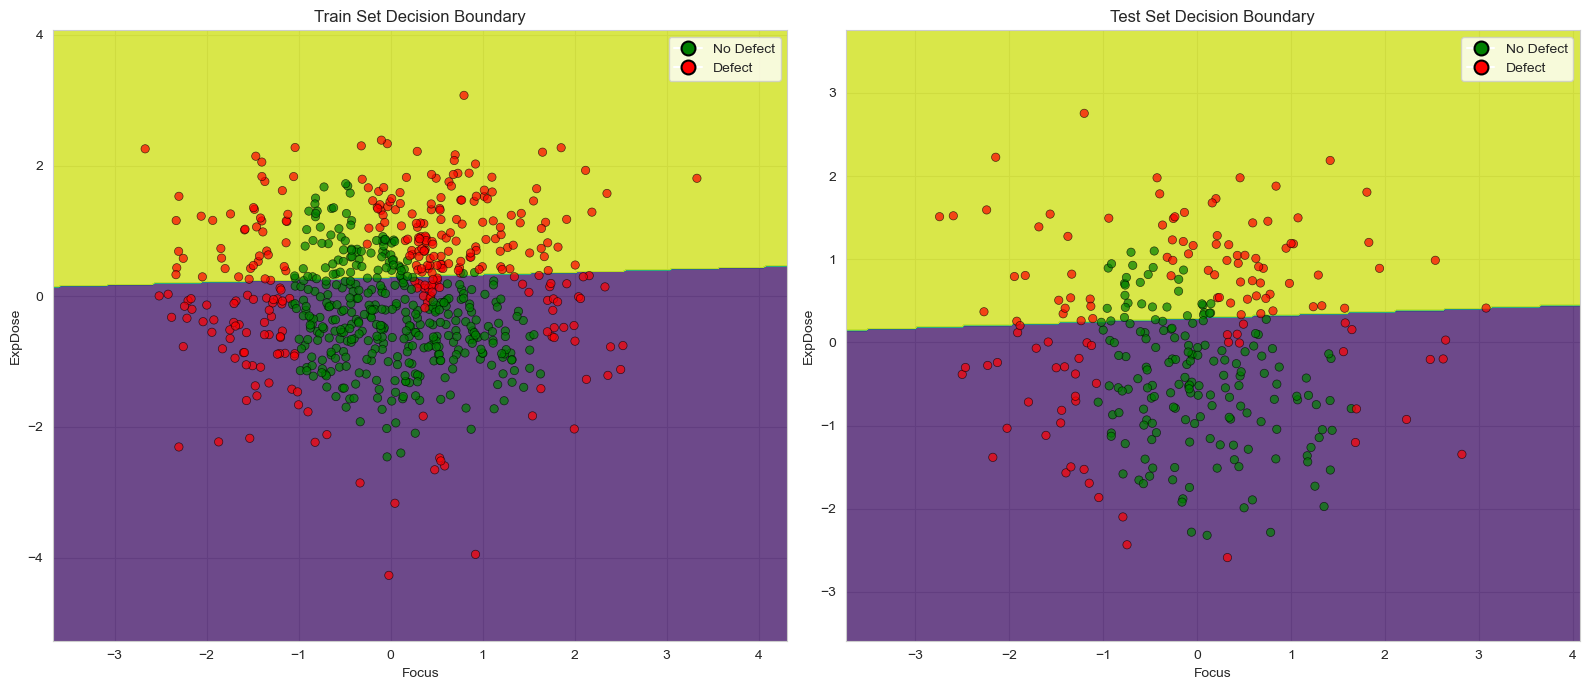

In [73]:
fig, ax = plt.subplots(1, 2, figsize=(16, 7))

plot_decision_boundary(X_train_scaled, y_train, log_reg, ax[0], "Train Set Decision Boundary")
plot_decision_boundary(X_test_scaled, y_test, log_reg, ax[1], "Test Set Decision Boundary")

plt.tight_layout()
plt.show()

In [74]:
from sklearn.ensemble import RandomForestClassifier

# Training a Random Forest Classifier without any hyperparameter tuning
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_scaled, y_train)

# Predicting on the test set
y_test_pred_rf = rf_classifier.predict(X_test_scaled)

# Evaluating the model performance on the test set
test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)
test_classification_report_rf = classification_report(y_test, y_test_pred_rf)

# Print evaluation metrics
print(f'accuracy: {test_accuracy_rf}\n')
print(test_classification_report_rf)

accuracy: 0.9633333333333334

              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97       173
         1.0       0.98      0.94      0.96       127

    accuracy                           0.96       300
   macro avg       0.97      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300



C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

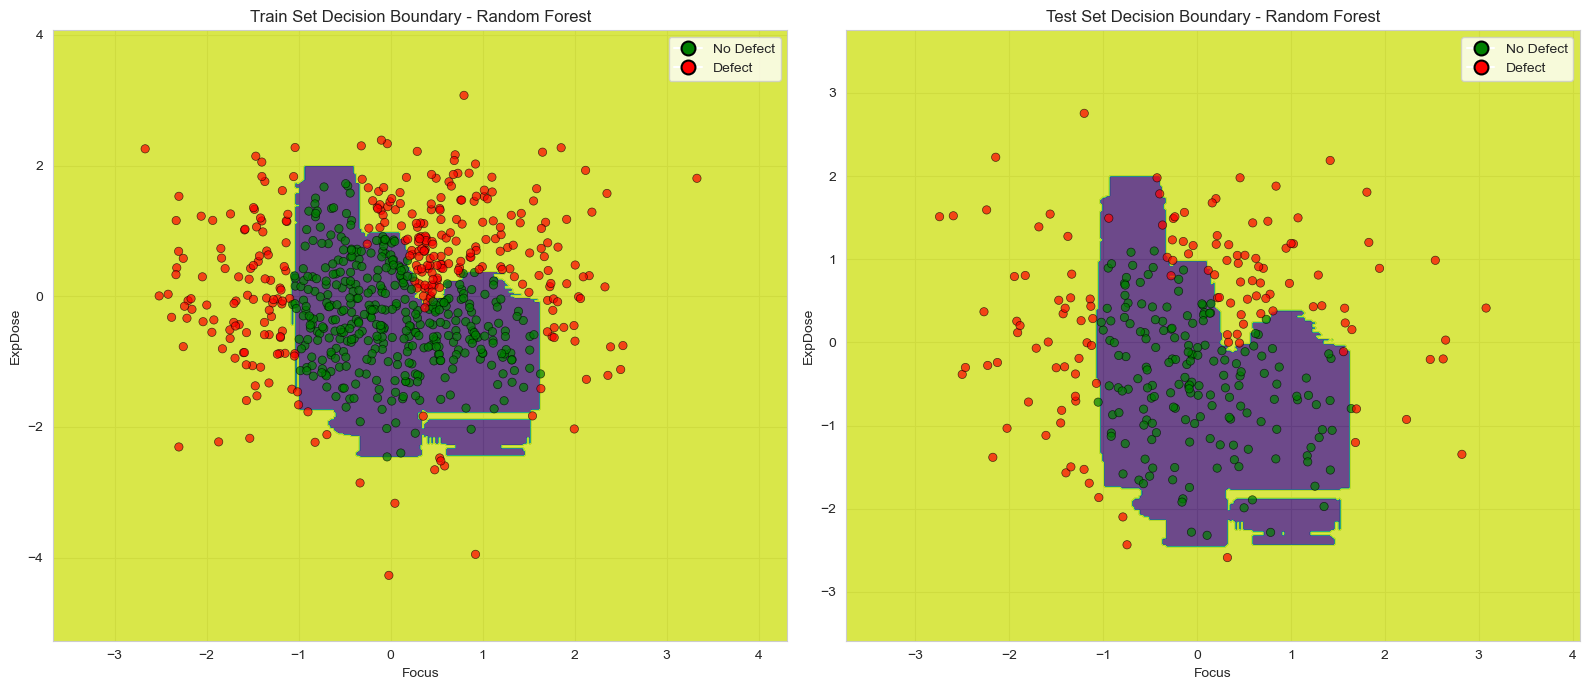

In [75]:
# Plotting decision boundaries for Random Forest classifier
fig, ax = plt.subplots(1, 2, figsize=(16, 7))

# Plot decision boundary for train set
plot_decision_boundary(X_train_scaled, y_train, rf_classifier, ax[0], "Train Set Decision Boundary - Random Forest")

# Plot decision boundary for test set
plot_decision_boundary(X_test_scaled, y_test, rf_classifier, ax[1], "Test Set Decision Boundary - Random Forest")

plt.tight_layout()
plt.show()

In [76]:
from sklearn.model_selection import GridSearchCV

# Defining the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

# Initializing the Grid Search model
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train_scaled, y_train)
best_params = grid_search.best_params_
best_rf_model = grid_search.best_estimator_

# Predicting on the test set with the best model
y_test_pred_best_rf = best_rf_model.predict(X_test_scaled)

# Evaluating the best model's performance
best_test_accuracy_rf = accuracy_score(y_test, y_test_pred_best_rf)
best_test_classification_report_rf = classification_report(y_test, y_test_pred_best_rf)

print(f'accuracy: {best_test_accuracy_rf}\n')
print(best_test_classification_report_rf)

Fitting 3 folds for each of 108 candidates, totalling 324 fits
accuracy: 0.9733333333333334

              precision    recall  f1-score   support

         0.0       0.97      0.98      0.98       173
         1.0       0.98      0.96      0.97       127

    accuracy                           0.97       300
   macro avg       0.97      0.97      0.97       300
weighted avg       0.97      0.97      0.97       300



C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

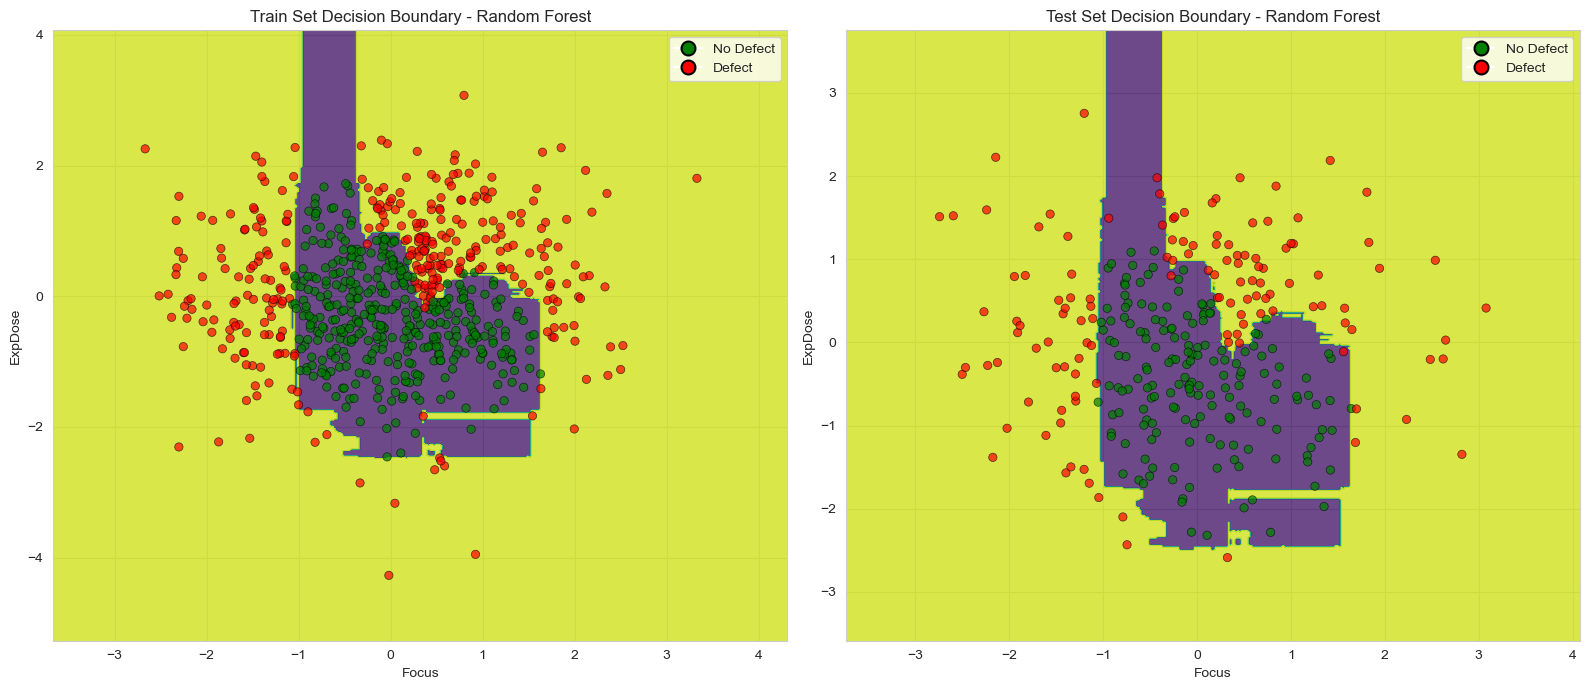

In [77]:
# Plotting decision boundaries for Random Forest classifier
fig, ax = plt.subplots(1, 2, figsize=(16, 7))

# Plot decision boundary for train set
plot_decision_boundary(X_train_scaled, y_train, best_rf_model, ax[0], "Train Set Decision Boundary - Random Forest")

# Plot decision boundary for test set
plot_decision_boundary(X_test_scaled, y_test, best_rf_model, ax[1], "Test Set Decision Boundary - Random Forest")

plt.tight_layout()
plt.show()

# Support Vector Machine (SVM) 

In [78]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Initialize the SVM model
svm_classifier = SVC(random_state=42)

svm_classifier.fit(X_train_scaled, y_train)

# Predict on the test set
y_test_pred_svm = svm_classifier.predict(X_test_scaled)

# Evaluate the model performance
svm_test_accuracy = accuracy_score(y_test, y_test_pred_svm)
svm_test_classification_report = classification_report(y_test, y_test_pred_svm)

print("Accuracy on Test Set:", svm_test_accuracy)
print("Classification Report:\n", svm_test_classification_report)

Accuracy on Test Set: 0.93
Classification Report:
               precision    recall  f1-score   support

         0.0       0.90      0.98      0.94       173
         1.0       0.97      0.86      0.91       127

    accuracy                           0.93       300
   macro avg       0.94      0.92      0.93       300
weighted avg       0.93      0.93      0.93       300



C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

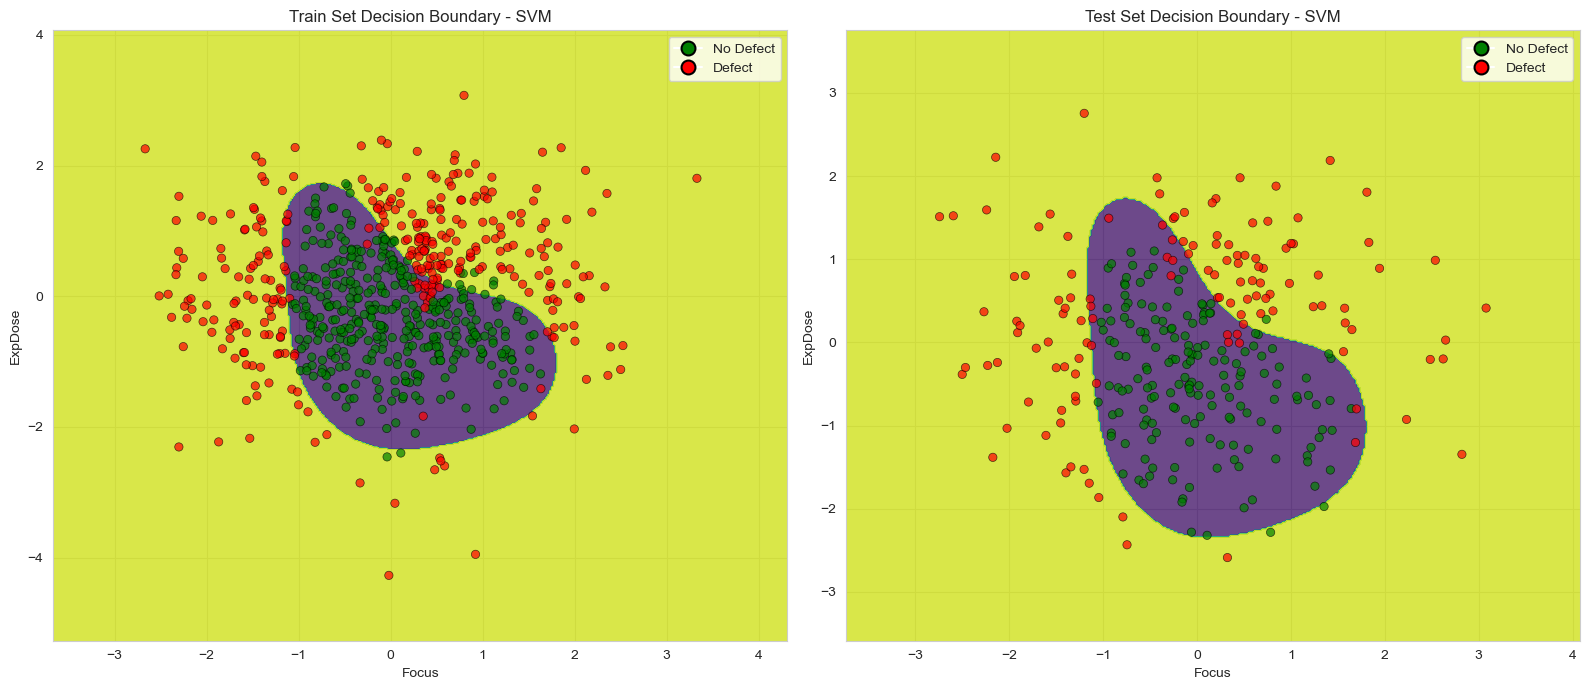

In [79]:
# Plotting decision boundaries for SVM classifier
fig, ax = plt.subplots(1, 2, figsize=(16, 7))

# Plot decision boundary for train set
plot_decision_boundary(X_train_scaled, y_train, svm_classifier, ax[0], "Train Set Decision Boundary - SVM")

# Plot decision boundary for test set
plot_decision_boundary(X_test_scaled, y_test, svm_classifier, ax[1], "Test Set Decision Boundary - SVM")

plt.tight_layout()
plt.show()

In [80]:
# SVM with Hyperparameter Tuning

from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid_svm = {
    'C': [0.1, 1, 10],  # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly'],  # Specifies the kernel type to be used in the algorithm
    'gamma': ['scale', 'auto'],  # Kernel coefficient for 'rbf', 'poly' and 'sigmoid'
    'degree': [2, 3, 4]  # Degree of the polynomial kernel function ('poly'). Ignored by all other kernels.
}

# Initialize the GridSearchCV object
grid_search_svm = GridSearchCV(SVC(random_state=42), param_grid_svm, cv=3, n_jobs=-1, verbose=2)
grid_search_svm.fit(X_train_scaled, y_train)
best_params_svm = grid_search_svm.best_params_
best_svm_model = grid_search_svm.best_estimator_
y_test_pred_best_svm = best_svm_model.predict(X_test_scaled)

# Evaluating the best model's performance
best_svm_test_accuracy = accuracy_score(y_test, y_test_pred_best_svm)
best_svm_test_classification_report = classification_report(y_test, y_test_pred_best_svm)

print("Best Parameters:", best_params_svm)
print("Accuracy on Test Set with Best SVM Model:", best_svm_test_accuracy)
print("Best SVM Classification Report:\n", best_svm_test_classification_report)

Fitting 3 folds for each of 54 candidates, totalling 162 fits
Best Parameters: {'C': 10, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}
Accuracy on Test Set with Best SVM Model: 0.95
Best SVM Classification Report:
               precision    recall  f1-score   support

         0.0       0.93      0.98      0.96       173
         1.0       0.97      0.91      0.94       127

    accuracy                           0.95       300
   macro avg       0.95      0.94      0.95       300
weighted avg       0.95      0.95      0.95       300



C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

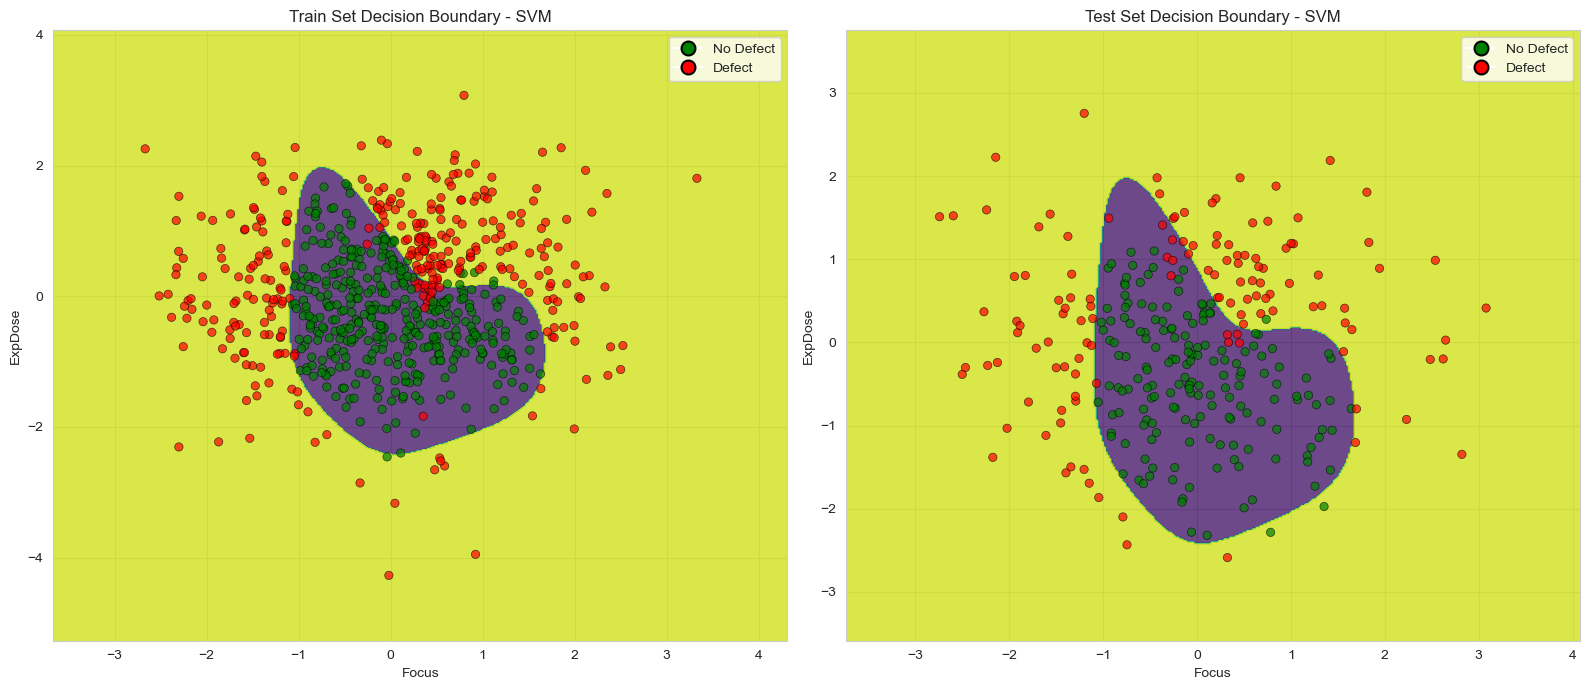

In [28]:
# Plotting decision boundaries for Random Forest classifier
fig, ax = plt.subplots(1, 2, figsize=(16, 7))

# Plot decision boundary for train set
plot_decision_boundary(X_train_scaled, y_train, best_svm_model, ax[0], "Train Set Decision Boundary - SVM")

# Plot decision boundary for test set
plot_decision_boundary(X_test_scaled, y_test, best_svm_model, ax[1], "Test Set Decision Boundary - SVM")

plt.tight_layout()
plt.show()

# MLPClassifier 

In [81]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the MLPClassifier
mlp_classifier = MLPClassifier(random_state=42, max_iter=1000)

mlp_classifier.fit(X_train_scaled, y_train)
y_test_pred_mlp = mlp_classifier.predict(X_test_scaled)

# Evaluate the model performance
mlp_test_accuracy = accuracy_score(y_test, y_test_pred_mlp)
mlp_test_classification_report = classification_report(y_test, y_test_pred_mlp)

print("MLP Classifier Accuracy on Test Set:", mlp_test_accuracy)
print("MLP Classifier Classification Report:\n", mlp_test_classification_report)

MLP Classifier Accuracy on Test Set: 0.95
MLP Classifier Classification Report:
               precision    recall  f1-score   support

         0.0       0.94      0.98      0.96       173
         1.0       0.97      0.91      0.94       127

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



C:\Users\Shahi\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

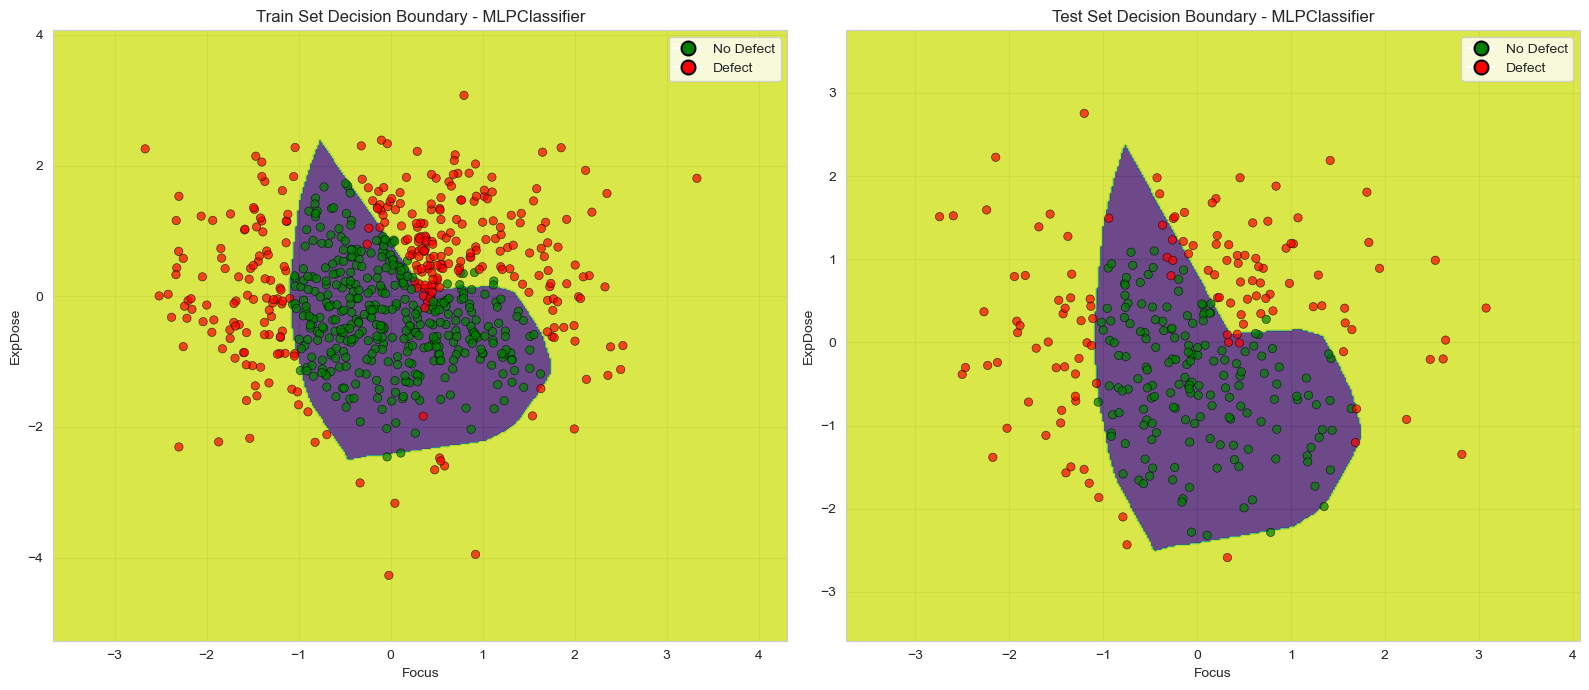

In [82]:
# Plotting decision boundaries for MLP Classifier
fig, ax = plt.subplots(1, 2, figsize=(16, 7))

# Plot decision boundary for train set
plot_decision_boundary(X_train_scaled, y_train, mlp_classifier, ax[0], "Train Set Decision Boundary - MLPClassifier")

# Plot decision boundary for test set
plot_decision_boundary(X_test_scaled, y_test, mlp_classifier, ax[1], "Test Set Decision Boundary - MLPClassifier")

plt.tight_layout()
plt.show()

In [83]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid_mlp = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)],  # Size of the hidden layers
    'activation': ['tanh', 'relu'],  # Activation function for the hidden layer
    'solver': ['sgd', 'adam'],  # The solver for weight optimization
    'learning_rate_init': [0.0001, 0.001, 0.01],  # Initial learning rate
    'max_iter': [1000]  # Maximum number of iterations
}

# Initialize the GridSearchCV object
grid_search_mlp = GridSearchCV(MLPClassifier(random_state=42), param_grid_mlp, cv=3, n_jobs=-1, verbose=2)
grid_search_mlp.fit(X_train_scaled, y_train)
best_params_mlp = grid_search_mlp.best_params_
best_mlp_model = grid_search_mlp.best_estimator_

# Predicting on the test set with the best model
y_test_pred_best_mlp = best_mlp_model.predict(X_test_scaled)

# Evaluating the best model's performance
best_mlp_test_accuracy = accuracy_score(y_test, y_test_pred_best_mlp)
best_mlp_test_classification_report = classification_report(y_test, y_test_pred_best_mlp)

print("Best MLP Parameters:", best_params_mlp)
print("Accuracy on Test Set with Best MLP Model:", best_mlp_test_accuracy)
print("Best MLP Classification Report:\n", best_mlp_test_classification_report)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best MLP Parameters: {'activation': 'tanh', 'hidden_layer_sizes': (50, 50), 'learning_rate_init': 0.001, 'max_iter': 1000, 'solver': 'adam'}
Accuracy on Test Set with Best MLP Model: 0.97
Best MLP Classification Report:
               precision    recall  f1-score   support

         0.0       0.97      0.98      0.97       173
         1.0       0.98      0.95      0.96       127

    accuracy                           0.97       300
   macro avg       0.97      0.97      0.97       300
weighted avg       0.97      0.97      0.97       300



C:\Users\Shahi\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

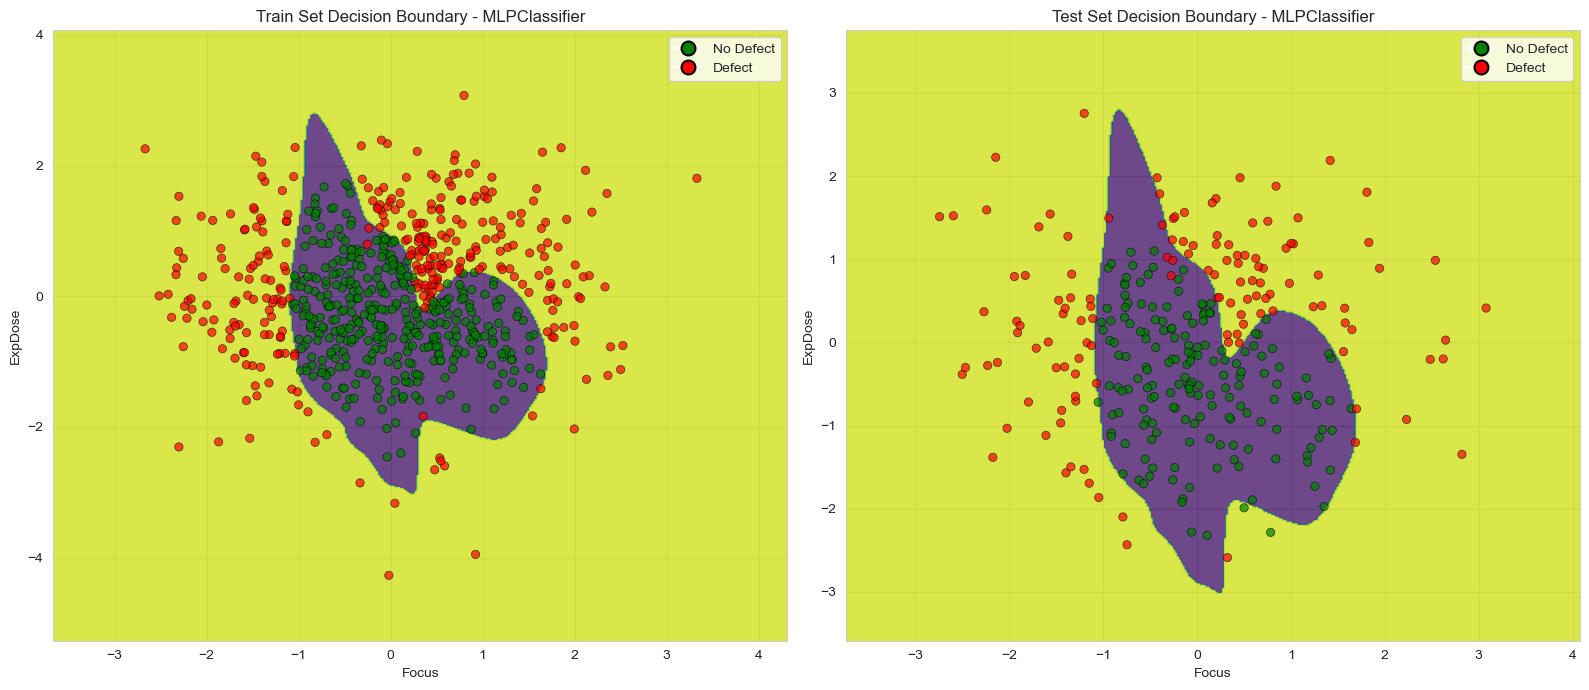

In [84]:
# Plotting decision boundaries for MLP Classifier
fig, ax = plt.subplots(1, 2, figsize=(16, 7))

# Plot decision boundary for train set
plot_decision_boundary(X_train_scaled, y_train, best_mlp_model, ax[0], "Train Set Decision Boundary - MLPClassifier")

# Plot decision boundary for test set
plot_decision_boundary(X_test_scaled, y_test, best_mlp_model, ax[1], "Test Set Decision Boundary - MLPClassifier")

plt.tight_layout()
plt.savefig("DecisionBoundaryMLPClassifier.png", dpi=300)
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

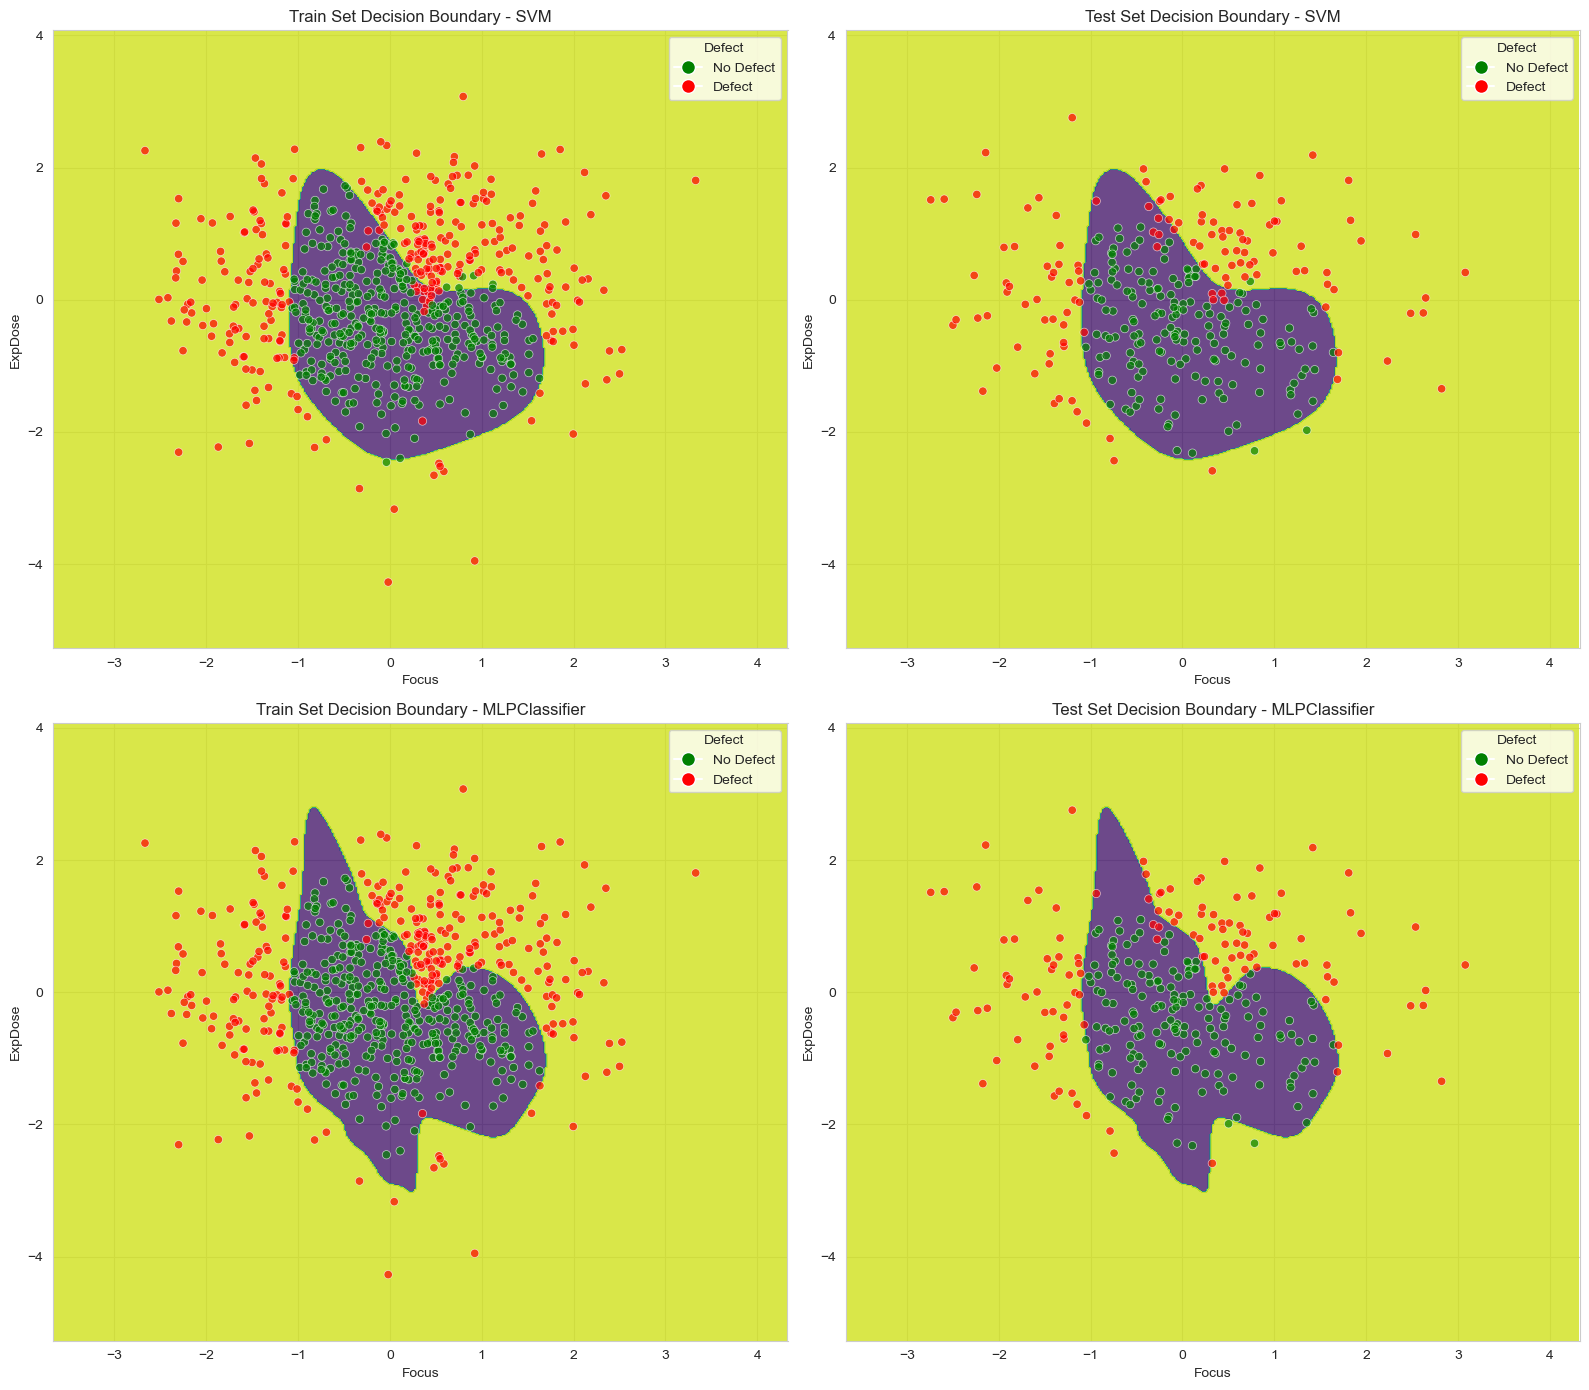

In [37]:
def plot_decision_boundary(X, y, model, ax, x_min, x_max, y_min, y_max, title="Decision Boundary"):
    # Generate a mesh grid based on the global min/max values
    h = 0.02  # step size in the mesh
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    # Predict the function value for the whole grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot the contour and training examples
    ax.contourf(xx, yy, Z, cmap=plt.cm.viridis, alpha=0.8)
    sns.scatterplot(ax=ax, x=X[:, 0], y=X[:, 1], hue=y, palette={0: 'green', 1: 'red'}, edgecolor='w', alpha=0.7)
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xlabel('Focus')
    ax.set_ylabel('ExpDose')
    ax.set_title(title)
    # Ensure consistent legend across subplots
    legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10, label='No Defect'),
                       Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Defect')]
    ax.legend(handles=legend_elements, title='Defect')

# Use the updated function with global min/max values for consistent plot ranges
fig, ax = plt.subplots(2, 2, figsize=(16, 14))

# Determine global min and max values for the entire dataset (train and test)
x_min, x_max = X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1
y_min, y_max = X_train_scaled[:, 1].min() - 1, X_train_scaled[:, 1].max() + 1

# Adjust function calls to include these min/max values
plot_decision_boundary(X_train_scaled, y_train, best_mlp_model, ax[1, 0], x_min, x_max, y_min, y_max, "Train Set Decision Boundary - MLPClassifier")
plot_decision_boundary(X_test_scaled, y_test, best_mlp_model, ax[1, 1], x_min, x_max, y_min, y_max, "Test Set Decision Boundary - MLPClassifier")
plot_decision_boundary(X_train_scaled, y_train, best_svm_model, ax[0, 0], x_min, x_max, y_min, y_max, "Train Set Decision Boundary - SVM")
plot_decision_boundary(X_test_scaled, y_test, best_svm_model, ax[0, 1], x_min, x_max, y_min, y_max, "Test Set Decision Boundary - SVM")

plt.tight_layout()
plt.savefig("DecisionBoundaryFullCoverage.png", dpi=300)
plt.show()